In [4]:
using Flux, Plots, Statistics, MLDatasets, Images
# https://www.youtube.com/watch?v=nMwjgCchTJc

In [2]:
train_x, train_y = MNIST(split=:train)[:]
test_x, test_y = MNIST(split = :test)[:]

(features = Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

...

Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], targets = [7, 2, 1, 0, 4, 1, 4, 9, 5, 9  …  7, 8, 9, 0, 1, 2, 3, 4, 5, 6])

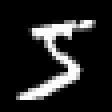

In [5]:
colorview(Gray, train_x[:, :, 1]')

In [11]:
xtrain = Flux.flatten(train_x)
xtest = Flux.flatten(test_x)

ytrain, ytest = Flux.onehotbatch(train_y, 0:9), Flux.onehotbatch(test_y, 0:9)
(m, n, z) = size(train_x)

(28, 28, 60000)

In [12]:
model = Flux.Chain(
                    Dense(m*n, 60, Flux.σ),
                    Dense(60, 60, Flux.σ),
                    Dense(60, 10, Flux.σ),
                    )

Chain(
  Dense(784 => 60, σ),                  # 47_100 parameters
  Dense(60 => 60, σ),                   # 3_660 parameters
  Dense(60 => 10, σ),                   # 610 parameters
)                   # Total: 6 arrays, 51_370 parameters, 201.039 KiB.

In [22]:
loss(x,y)=Flux.Losses.mse(model(x), y)
accuracy(x, y) = Statistics.mean(Flux.onecold(model(x)) .== Flux.onecold(y))
opt = Descent(0.23) # this is full gradien descent, not stochcastic
data = [(xtrain, ytrain)]
parameters = Flux.params(model)
println("old loss = $(loss(xtrain, ytrain))")
println("old accuracy = $(accuracy(xtrain, ytrain))")
Flux.train!(loss, parameters, data, opt)
println("new loss = $(loss(xtrain, ytrain))")
println("new accuracy = $(accuracy(xtrain, ytrain))")

old loss = 0.25748214
old accuracy = 0.09776666666666667
new loss = 0.24156658
n ew accuracy = 0.09743333333333333


In [23]:
(m, n) = size(xtrain)

# Train the model over 100_000 epochs
for epoch in 1:100_000
    # Randomly select a entry of training data 
    i = rand(1:n)
    data = [(xtrain[:, i], ytrain[:, i])]

    # Implement Stochastic Gradient Descent 
    Flux.train!(loss, parameters, data, opt)

    # Print loss function values 
    if epoch % 10_000 == 0
        println("Epoch: $(epoch)")
        @show loss(xtrain, ytrain)
        @show accuracy(xtrain, ytrain)
        println()
    end
end

Epoch: 10000
loss(xtrain, ytrain) = 0.055092577f0
accuracy(xtrain, ytrain) = 0.6837

Epoch: 20000
loss(xtrain, ytrain) = 0.027904212f0
accuracy(xtrain, ytrain) = 0.8501

Epoch: 30000
loss(xtrain, ytrain) = 0.019875824f0
accuracy(xtrain, ytrain) = 0.8895333333333333

Epoch: 40000
loss(xtrain, ytrain) = 0.01641319f0
accuracy(xtrain, ytrain) = 0.9047333333333333

Epoch: 50000
loss(xtrain, ytrain) = 0.015087494f0
accuracy(xtrain, ytrain) = 0.91135

Epoch: 60000
loss(xtrain, ytrain) = 0.01358703f0
accuracy(xtrain, ytrain) = 0.9194833333333333

Epoch: 70000
loss(xtrain, ytrain) = 0.012827371f0
accuracy(xtrain, ytrain) = 0.92365

Epoch: 80000
loss(xtrain, ytrain) = 0.012336708f0
accuracy(xtrain, ytrain) = 0.9261

Epoch: 90000
loss(xtrain, ytrain) = 0.011498272f0
accuracy(xtrain, ytrain) = 0.9305833333333333

Epoch: 100000
loss(xtrain, ytrain) = 0.010785331f0
accuracy(xtrain, ytrain) = 0.93555



Predict digit: 5
5


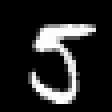

In [24]:
i = rand(1:1_000)

predict(i) = argmax(model(xtest[:, i])) - 1

digit = predict(i)
println("Predict digit: $(digit)")
println(argmax(ytest[:, i]) - 1)

colorview(Gray, test_x[:,:,i]')

Definitive testing

In [2]:
using Flux, Plots, Statistics, MLDatasets, Images, TimeSeries, CSV, DataFrames

N=2

m = Chain(Flux.RNN(N => 5), Dense(5 => 1))
Chain(
  Flux.Recur(
    Flux.RNNCell(N => 5, tanh),              # 45 parameters
  ),
  Dense(5 => 1),                        # 6 parameters
)

x = [rand(Float32, 2) for i = 1:3]
y = [m(xi) for xi in x]

3-element Vector{Vector{Float32}}:
 [1.2113732]
 [0.68794775]
 [0.9147145]

In [3]:
function loss(x, y)
  sum(mse(m(xi), yi) for (xi, yi) in zip(x, y))
end

seq_init = [rand(Float32, 2)]
seq_1 = [rand(Float32, 2) for i = 1:3]
seq_2 = [rand(Float32, 2) for i = 1:3]

y1 = [rand(Float32, 1) for i = 1:3]
y2 = [rand(Float32, 1) for i = 1:3]

X = [seq_1, seq_2]
Y = [y1, y2]
data = zip(X,Y)

Flux.reset!(m)
[m(x) for x in seq_init]

ps = Flux.params(m)
opt= Adam(1e-3)
Flux.train!(loss, ps, data, opt)

In [2]:
using Flux, Plots, Statistics, MLDatasets, Images, TimeSeries, CSV, DataFrames

Ejemplo robado de: # https://www.jldc.ch/posts/recurrent-models-in-flux/

In [64]:
# Load necessary packages to read CSV data
using CSV, DataFrames 
# Load the AAPL data into a DataFrame
data = CSV.read("BAJAJFINSV.csv", DataFrame)

# Keep only the close price, and convert the datatype to Float32, 
# Float32 is NECESSARY for recurrent models in Flux
price = Float32.(data.VWAP)
# Create a vector of features (our input) and a vector of labels (our target output)
X_original = price[1:end-1]
Y = price[2:end]

3200-element Vector{Float32}:
   572.15
   618.37
   659.6
   636.41
   670.51
   665.87
   602.36
   610.65
   628.44
   624.95
   653.65
   662.71
   614.22
     ⋮
  9587.77
  9694.01
  9823.88
  9501.23
  9824.26
  9746.74
  9956.69
  9995.72
 10036.76
 10445.96
 10980.4
 11081.78

In [65]:
# Reshape input data into Flux recurrent data format
X = [[x] for x ∈ X_original]

3200-element Vector{Vector{Float32}}:
 [548.85]
 [572.15]
 [618.37]
 [659.6]
 [636.41]
 [670.51]
 [665.87]
 [602.36]
 [610.65]
 [628.44]
 [624.95]
 [653.65]
 [662.71]
 ⋮
 [9212.67]
 [9587.77]
 [9694.01]
 [9823.88]
 [9501.23]
 [9824.26]
 [9746.74]
 [9956.69]
 [9995.72]
 [10036.76]
 [10445.96]
 [10980.4]

In [37]:
model = Chain(
    RNN(1 => 32, relu),
    Dense(32 => 1, identity)
)

Chain(
  Recur(
    RNNCell(1 => 32, relu),             # 1_120 parameters
  ),
  Dense(32 => 1),                       # 33 parameters
)         # Total: 6 trainable arrays, 1_153 parameters,
          # plus 1 non-trainable, 32 parameters, summarysize 4.871 KiB.

In [38]:
# Train the model
epochs = 100
opt = ADAM()
θ = Flux.params(model) # Keep track of the model parameters
for epoch ∈ 1:epochs # Training loop
    Flux.reset!(model) # Reset the hidden state of the RNN
    # Compute the gradient of the mean squared error loss
    ∇ = gradient(θ) do
        model(X[1]) # Warm-up the model
        sum(Flux.Losses.mse.([model(x)[1] for x ∈ X[2:end]], Y[2:end]))
    end
    Flux.update!(opt, θ, ∇) # Update the parameters
end

In [68]:
YY = [model(x)[1] for x ∈ X]
YY

3200-element Vector{Float32}:
  5152.0117
  4441.05
  2310.8274
  2553.2625
  1733.8044
  1934.5981
   919.25037
  1333.829
   597.4862
   962.412
   510.06442
   830.97253
   519.1509
     ⋮
  9435.061
  9598.733
  9600.444
  9744.863
  9564.684
  9793.983
  9678.9375
  9906.0
  9855.096
 10007.65
 10165.8955
 10578.103

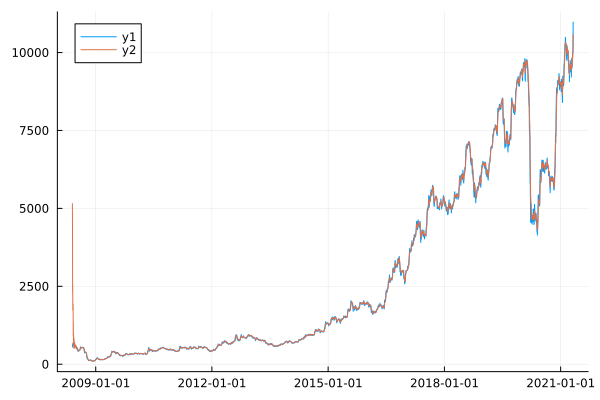

In [71]:
plot(data.Date[1:end-1], [X_original YY])

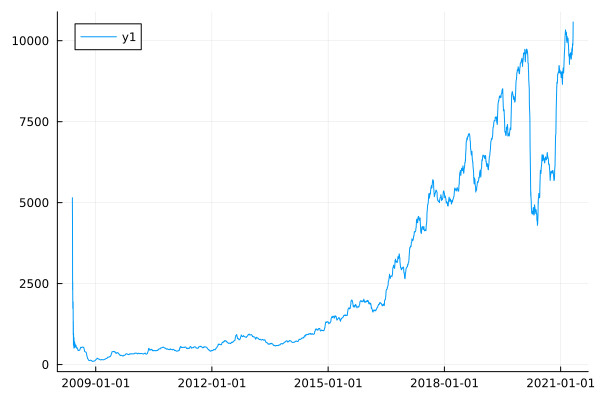

In [13]:
data

Row,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
,Date,String15,String3,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Int64,Float64,Float64?,Int64,Float64
1,2008-05-26,BAJAJFINSV,EQ,2101.05,600.0,619.0,501.0,505.1,509.1,548.85,3145446,1.72637e14,missing,908264,0.2888
2,2008-05-27,BAJAJFINSV,EQ,509.1,505.0,610.95,491.1,564.0,554.65,572.15,4349144,2.48837e14,missing,677627,0.1558
3,2008-05-28,BAJAJFINSV,EQ,554.65,564.0,665.6,564.0,643.0,640.95,618.37,4588759,2.83753e14,missing,774895,0.1689
4,2008-05-29,BAJAJFINSV,EQ,640.95,656.65,703.0,608.0,634.5,632.4,659.6,4522302,2.98292e14,missing,1006161,0.2225
5,2008-05-30,BAJAJFINSV,EQ,632.4,642.4,668.0,588.3,647.0,644.0,636.41,3057669,1.94593e14,missing,462832,0.1514
6,2008-06-02,BAJAJFINSV,EQ,644.0,650.0,699.0,622.0,687.0,686.95,670.51,2247399,1.50691e14,missing,351112,0.1562
7,2008-06-03,BAJAJFINSV,EQ,686.95,672.0,689.8,632.55,670.55,672.05,665.87,2299383,1.53108e14,missing,391772,0.1704
8,2008-06-04,BAJAJFINSV,EQ,672.05,674.0,674.0,566.6,595.0,598.95,602.36,2832725,1.70632e14,missing,735765,0.2597
9,2008-06-05,BAJAJFINSV,EQ,598.95,603.0,639.8,572.3,631.5,631.85,610.65,1344712,8.21152e13,missing,167819,0.1248


3200-element Vector{Float32}:
   548.85
   572.15
   618.37
   659.6
   636.41
   670.51
   665.87
   602.36
   610.65
   628.44
   624.95
   653.65
   662.71
     ⋮
  9212.67
  9587.77
  9694.01
  9823.88
  9501.23
  9824.26
  9746.74
  9956.69
  9995.72
 10036.76
 10445.96
 10980.4